In [1]:
%load_ext memory_profiler
%load_ext line_profiler

# timer grabbed from https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python
from timeit import default_timer as timer
class benchmark(object):
    def __init__(self, msg, fmt="%0.3g"):
        self.msg = msg
        self.fmt = fmt

    def __enter__(self):
        self.start = timer()
        return self

    def __exit__(self, *args):
        t = timer() - self.start
        print(("%s: " + self.fmt + " seconds") % (self.msg, t))
        self.time = t

# Problem

In this assignment we will revisit an old friend, the traveling salesman problem (TSP).
This week you will implement a heuristic for the TSP, rather than an exact algorithm, and as a result will be able to handle much larger problem sizes.
Here is a data file describing a TSP instance ([original source]( http://www.math.uwaterloo.ca/tsp/world/bm33708.tsp)).

- nn.txt

The first line indicates the number of cities.
Each city is a point in the plane, and each subsequent line indicates the x- and y-coordinates of a single city.

The distance between two cities is defined as the Euclidean distance --- that is, two cities at locations $(x,y)$ and $(z,w)$ have distance $\sqrt{(x-z)^2 + (y-w)^2}$ between them.

You should implement the nearest neighbor heuristic:

- Start the tour at the first city.
- Repeatedly visit the closest city that the tour hasn't visited yet.
  In case of a tie, go to the closest city with the lowest index.
  For example, if both the third and fifth cities have the same distance from the first city (and are closer than any other city), then the tour should begin by going from the first city to the third city.
- Once every city has been visited exactly once, return to the first city to complete the tour.

In the box below, enter the cost of the traveling salesman tour computed by the nearest neighbor heuristic for this instance, rounded down to the nearest integer.

[Hint: when constructing the tour, you might find it simpler to work with squared Euclidean distances (i.e., the formula above but without the square root) than Euclidean distances.
But don't forget to report the length of the tour in terms of standard Euclidean distance.]

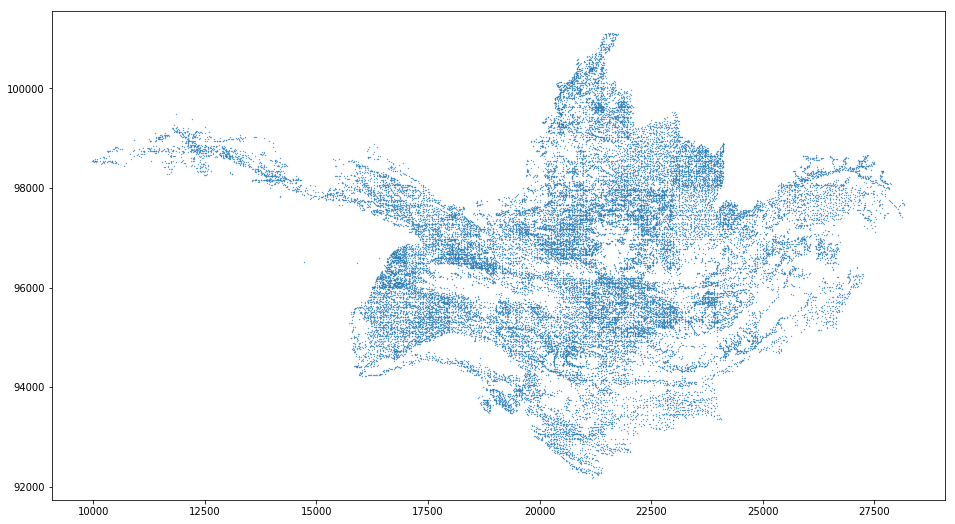

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_cities(filename):
    ncities = 0
    X, Y = [], []
    for n, line in enumerate(open(filename)):
        if n == 0:
            ncities = int(line[0])
        else:
            i, x, y = map(float, line.split())
            X.append(x)
            Y.append(y)
    
    f, ax = plt.subplots(figsize=(16, 9))
    ax.scatter(X, Y, s=0.1)
    plt.show()
    
    return ncities, X, Y

n, X, Y = plot_cities("nn.txt")

### Nearest Neighbor Heuristic 
- Start the tour at the first city.
- Repeatedly visit the closest city that the tour hasn't visited yet.
  In case of a tie, go to the closest city with the lowest index.
  For example, if both the third and fifth cities have the same distance from the first city (and are closer than any other city), then the tour should begin by going from the first city to the third city.
- Once every city has been visited exactly once, return to the first city to complete the tour.

In [3]:
import numpy as np

def readfile(filename):
    """ Read city labels and coordinates. """
    ncities = 0
    coord = None
    
    with open(filename) as r:
        ncities = int(r.readline().split()[0])
        coord = np.genfromtxt(r, names=['i', 'x', 'y'], dtype="u2, f8, f8") # precision matters
    
    return ncities, coord

def tsp_greedy(ncities, coord):
    """ TSP using nearest neighbor heuristic.
    ncities -- number of cities
    coord -- a map of numpy array {'i': labels, 'x': x coordinates, 'y': y coordinates}
    
    return: the TSP distance
    """
    
    # final path sequence
    explored = []
    explored.append(0)
    last_idx = 0
    value = 0
    
    while len(explored) != ncities:
        x, y = coord['x'][last_idx], coord['y'][last_idx]
        d = (coord['x'] - x) ** 2 + (coord['y'] - y) ** 2
        d[explored] = np.inf
        last_idx = np.argmin(d)
        explored.append(last_idx)
        value += np.sqrt(d[last_idx])
    
    x, y = coord['x'][last_idx], coord['y'][last_idx]
    x0, y0 = coord['x'][0], coord['y'][0]
    value += np.sqrt((x - x0) ** 2 + (y - y0) ** 2)
    
    return value

In [4]:
# test case (n = 8) -- 23

ncities, coord = readfile("test.txt")
with benchmark("Nearest neighbor TSP on test.txt") as b:
    v = int(tsp_greedy(ncities, coord))
assert v == 23, "Nearest neighbor TSP does NOT pass test case test.txt."
print "Nearest neighbor TSP passes test case test.txt."

Nearest neighbor TSP on test.txt: 0.000157 seconds
Nearest neighbor TSP passes test case test.txt.


In [5]:
# test case (n = 8000) -- 654724

ncities, coord = readfile("test1.txt")
with benchmark("Nearest neighbor TSP on test1.txt") as b:
    v = int(tsp_greedy(ncities, coord))
assert v == 654724, "Nearest neighbor TSP does NOT pass test case test1.txt."
print "Nearest neighbor TSP passes test case test1.txt."

Nearest neighbor TSP on test1.txt: 3.33 seconds
Nearest neighbor TSP passes test case test1.txt.


In [6]:
ncities, coord = readfile("nn.txt")
with benchmark("Nearest neighbor TSP on nn.txt") as b:
    v = int(tsp_greedy(ncities, coord))

Nearest neighbor TSP on nn.txt: 54.4 seconds


In [7]:
# print v